In [58]:
import json
import pandas as pd
from os import walk
import numpy as np

In [33]:
def load_logs(path):
    names = [
        'time',
        'latitude',
        'longitude',
        'altitude',
        'velocity_surface_x',
        'velocity_surface_y',
        'velocity_surface_z',
        'velocity_orbit_x',
        'velocity_orbit_y',
        'velocity_orbit_z',
        'mass',
        'apoapsis',
        'surface_mag',
        'mysteer_angle',
    ]
    types = [
        'timestamp',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
        'value',
    ]
    data = []
    _, _, filenames = next(walk(path))
    for file in filenames:
        with open(path+file) as f:
            d = json.load(f)
            #print(d)
            i = 0
            data_row = {}
            for row in d['items']:                
                data_row[names[i]] = row[types[i]]                
                i += 1
            data.append(data_row)
    return data

In [108]:
df = pd.DataFrame(load_logs('logs/'))

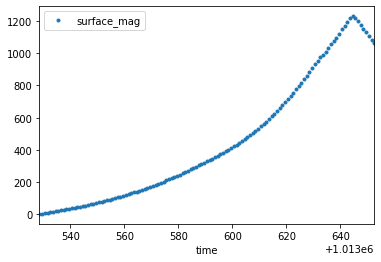

In [109]:
df.plot(x='time', y=['surface_mag'], style = '.')

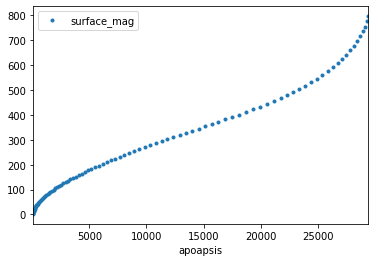

In [111]:
df[df.surface_mag<800].plot(x='apoapsis', y=['surface_mag'], style = '.')

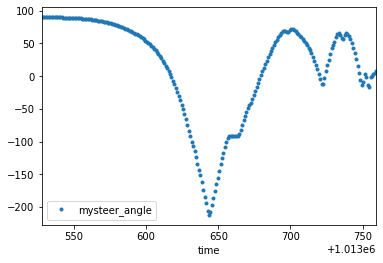

In [101]:
df.plot(x='time', y=['mysteer_angle'], style = '.')

In [57]:
# df['coeff'] = - df.mysteer_angle / df.surface_mag

In [81]:
df

,time,latitude,longitude,altitude,velocity_surface_x,velocity_surface_y,velocity_surface_z,velocity_orbit_x,velocity_orbit_y,velocity_orbit_z,mass,apoapsis,surface_mag,mysteer_angle,coeff
0,1.013534e+06,-0.097108,-74.557961,781.434648,-4.915337,-0.071864,69.004407,-179.570024,-0.071864,55.599959,5.291516e+22,1021.131617,69.179288,90,-4.785774e+03
1,1.013557e+06,-0.097051,-74.526436,3560.470867,-58.243110,-0.305962,176.144197,-233.698356,-0.305962,162.581520,5.291516e+22,5246.205295,185.523938,80,-3.441913e+04
2,1.013637e+06,-0.096707,-70.223175,33366.324187,-1531.521901,-0.661757,264.391670,-1714.056409,-0.661757,236.383637,5.291516e+22,61302.522125,1554.175900,20,-2.415463e+06
3,1.013601e+06,-0.097059,-73.613289,17640.287687,-585.176487,-0.699762,370.365924,-764.481847,-0.699762,353.628278,5.291516e+22,28474.537311,692.533702,30,-4.796029e+05
4,1.013596e+06,-0.097065,-73.842339,15530.420096,-474.984069,-0.701693,378.396425,-653.741930,-0.701693,362.476847,5.291516e+22,25801.482618,607.623989,30,-3.692069e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,1.013522e+06,-0.097163,-74.557709,216.213681,-1.967355,0.001717,26.851756,-176.457653,0.001717,13.459153,5.291516e+22,247.110110,26.923731,90,-7.248873e+02
136,1.013514e+06,-0.097198,-74.557678,92.038765,-0.362254,0.041549,4.781713,-174.816437,0.041549,-8.608206,5.291516e+22,86.920501,4.795595,90,-2.299773e+01
137,1.013632e+06,-0.096776,-70.873436,30917.505274,-1438.775893,-0.674431,283.315237,-1620.909575,-0.674431,257.480858,5.291516e+22,54881.598766,1466.405144,20,-2.150344e+06
138,1.013605e+06,-0.097050,-73.392532,19325.670621,-682.029162,-0.672527,351.118181,-861.758059,-0.672527,333.642311,5.291516e+22,30149.177520,767.486016,20,-5.890348e+05


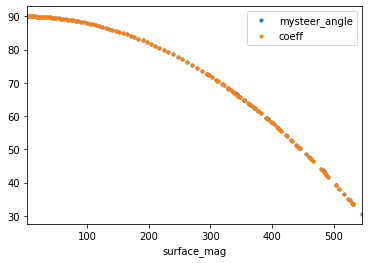

In [102]:
#df['coeff'] = -np.tg(df.surface_mag)*2+90
df['coeff'] = -df.surface_mag**2/5000+90
df[df.mysteer_angle>30].plot(x='surface_mag', y=['mysteer_angle', 'coeff'], style = '.')

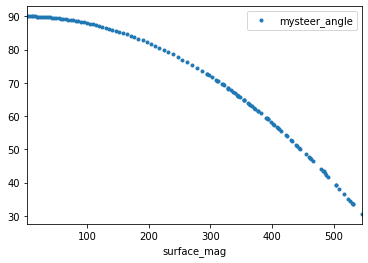

In [103]:
df[df.mysteer_angle>30].plot(x='surface_mag', y=['mysteer_angle'], style = '.')

In [104]:
min(df.surface_mag), max(df.surface_mag)

(2.3220764931598405, 1229.1500760038448)

In [105]:
df.columns

Index(['time', 'latitude', 'longitude', 'altitude', 'velocity_surface_x',
       'velocity_surface_y', 'velocity_surface_z', 'velocity_orbit_x',
       'velocity_orbit_y', 'velocity_orbit_z', 'mass', 'apoapsis',
       'surface_mag', 'mysteer_angle', 'coeff'],
      dtype='object')

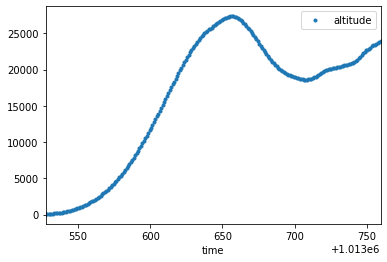

In [106]:
df.plot(x='time', y=['altitude'], style = '.')

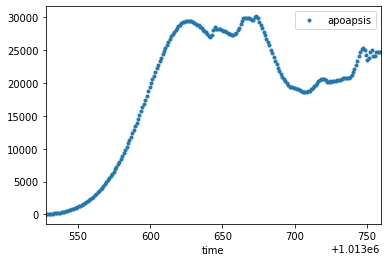

In [107]:
df.plot(x='time', y=['apoapsis'], style = '.')

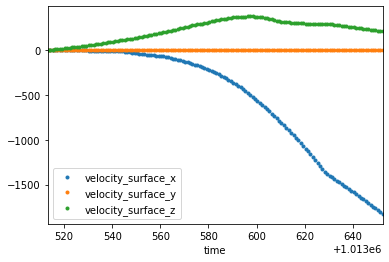

In [39]:
df.plot(x='time', y=['velocity_surface_x','velocity_surface_y', 'velocity_surface_z'], style = '.')

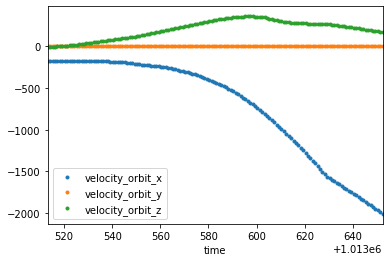

In [40]:
df.plot(x='time', y=['velocity_orbit_x','velocity_orbit_y', 'velocity_orbit_z'], style = '.')